# Very simple notebook to get to a simple regression model

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# get pandas
import pandas as pd
# we'll do some visual checks, get the necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
# import the dataset
df = pd.read_pickle('../dataframes/df_red.pkl')

In [3]:
# quick check of dataset
df.describe()

,OverallQual,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,GarageYrBlt,log_SalePrice,log_GrLivArea,log_KitchenAbvGr,log_EnclosedPorch
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,6.093964,472.050069,1052.537037,1158.851166,1.563786,6.510974,1971.218107,1976.465021,12.024015,7.266762,0.711699,0.698976
std,1.376369,212.239248,414.982320,372.039498,0.549891,1.615880,30.193754,26.299692,0.399713,0.330142,0.089326,1.728308
min,1.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1872.000000,10.460271,5.814131,0.000000,0.000000
25%,5.000000,331.500000,795.250000,882.000000,1.000000,5.000000,1954.000000,1959.000000,11.774720,7.029530,0.693147,0.000000
50%,6.000000,479.500000,991.000000,1086.000000,2.000000,6.000000,1972.500000,1978.000000,12.001512,7.287901,0.693147,0.000000
75%,7.000000,576.000000,1296.750000,1390.750000,2.000000,7.000000,2000.000000,2001.000000,12.273736,7.482682,0.693147,0.000000
max,10.000000,1390.000000,3206.000000,3228.000000,3.000000,14.000000,2010.000000,2010.000000,13.534474,8.406708,1.386294,6.315358


In [6]:
# input features
x_names = []
for col in df.columns:
    if 'SalePrice' not in col:
        x_names += [col]
# output
y_name = 'log_SalePrice'

In [9]:
# prep scikit
X = df[x_names].values
y = df[y_name].values

In [11]:
names = x_names

Optimal number of features : 11


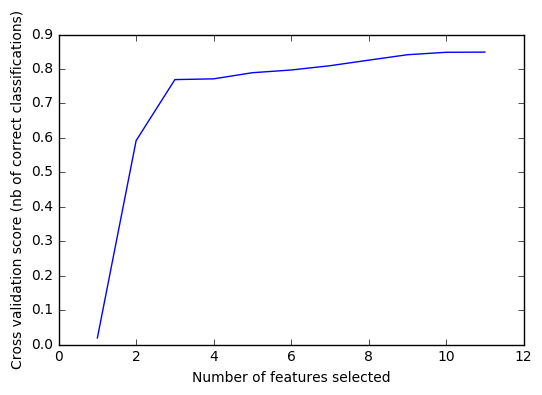

In [19]:
from sklearn.feature_selection import RFECV
from sklearn import linear_model

# Create the RFE object and compute a cross-validated score.
lr = linear_model.LinearRegression()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=lr, step=1, cv=3,
              scoring='r2')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Optimal number of features : 9


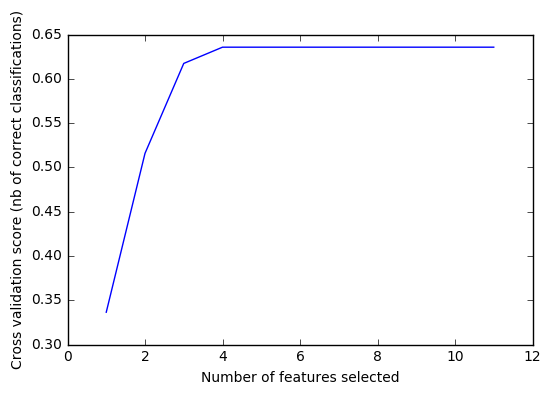

In [20]:
# same thing for lasso
# Create the RFE object and compute a cross-validated score.
lr = linear_model.Lasso()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=lr, step=1, cv=3,
              scoring='r2')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Optimal number of features : 11


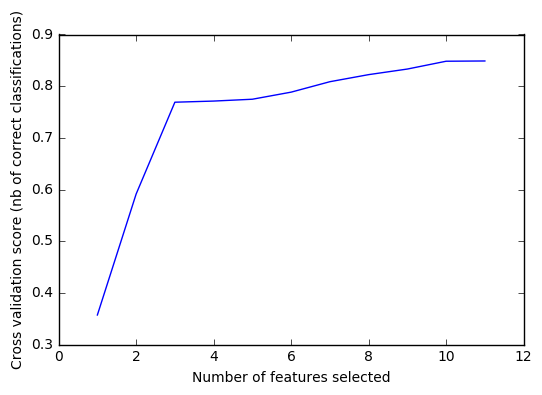

In [21]:
# Same thing for ridge
# Create the RFE object and compute a cross-validated score.
lr = linear_model.Ridge()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=lr, step=1, cv=3,
              scoring='r2')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [22]:
# looks like there are three features dominating, which are those?
lr = linear_model.Lasso()
lr.fit(X, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
# check those coefficients
for a,b in zip(x_names,lr.coef_):
    print (a,b)     

OverallQual 0.0
GarageArea 0.000647425309608
TotalBsmtSF 0.000229457198424
1stFlrSF 0.000221025750017
FullBath 0.0
TotRmsAbvGrd 0.0
YearBuilt 0.00247018354153
GarageYrBlt 0.0
log_GrLivArea 0.0
log_KitchenAbvGr -0.0
log_EnclosedPorch -0.0


In [29]:
# done! basically you need 
# 1) garage dimension
# 2) basement dimension
# 3) 1st floor dimension
# 4) year built
red_var = []
for name, coeff in zip(x_names,lr.coef_):
    if coeff > 0:
        red_var += [name]
red_var

['GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']

In [32]:
# prep the new df
# prep scikit
X = df[red_var].values
y = df[y_name].values
names = red_var

In [33]:
# now now, time to tune ElasticNet (a mix of Ridge and Lasso)
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(X, y)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [34]:
# now I can access the optimized values for alpha and l1_ratio
print(regr.alpha_) 
print(regr.l1_ratio_) 

0.214680062849
0.5


In [36]:
# similarly can access the score
print(regr.score(X,y)) 

0.64775082178


In [38]:
# finally can retrain the elastic net on the entire train dataset
model = linear_model.ElasticNet(alpha=0.214680062849, l1_ratio=0.5)
model.fit(X,y)

ElasticNet(alpha=0.214680062849, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [39]:
print(model.score(X,y))

0.64775082178


In [41]:
# check those coefficients
for a,b in zip(names,model.coef_):
    print (a,b)     

GarageArea 0.000593846647851
TotalBsmtSF 0.000192466851842
1stFlrSF 0.000246112496913
YearBuilt 0.00374614636694


In [42]:
# done, save the model
import pickle
pickle.dump(model, open('../models/elastic_net_v1.pkl', 'wb'))

In [43]:
print(names)

['GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']
